## Libraries

In [65]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp, entropy, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

## The Dataset

I already merged the observations and label into one single csv sheet

In [7]:
df = pd.read_csv("data_and_labels.csv")

In [9]:
print(df.head())  
print(df.info())

          X         Y  label
0  0.241494  0.032837      0
1  0.167903  0.020489      1
2  0.115480  0.003519      2
3  0.044780  0.018246      3
4  0.232627  0.014041      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X       200000 non-null  float64
 1   Y       200000 non-null  float64
 2   label   200000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 4.6 MB
None


In [11]:
df.isnull().sum()

X        0
Y        0
label    0
dtype: int64

In [13]:
split = len(df) // 2
first_half, second_half = df.iloc[:split], df.iloc[split:]

## Visualizations and Statistics

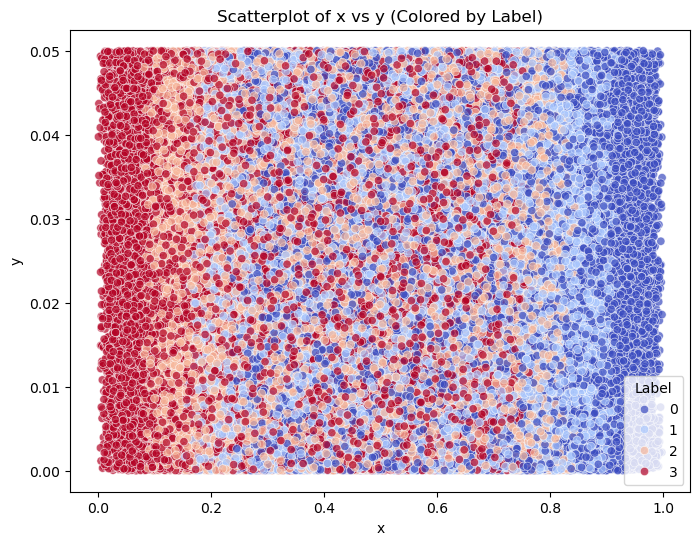

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="X", y="Y", hue="label", palette="coolwarm", alpha=0.7)
plt.title("Scatterplot of x vs y (Colored by Label)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(title="Label")
plt.show()

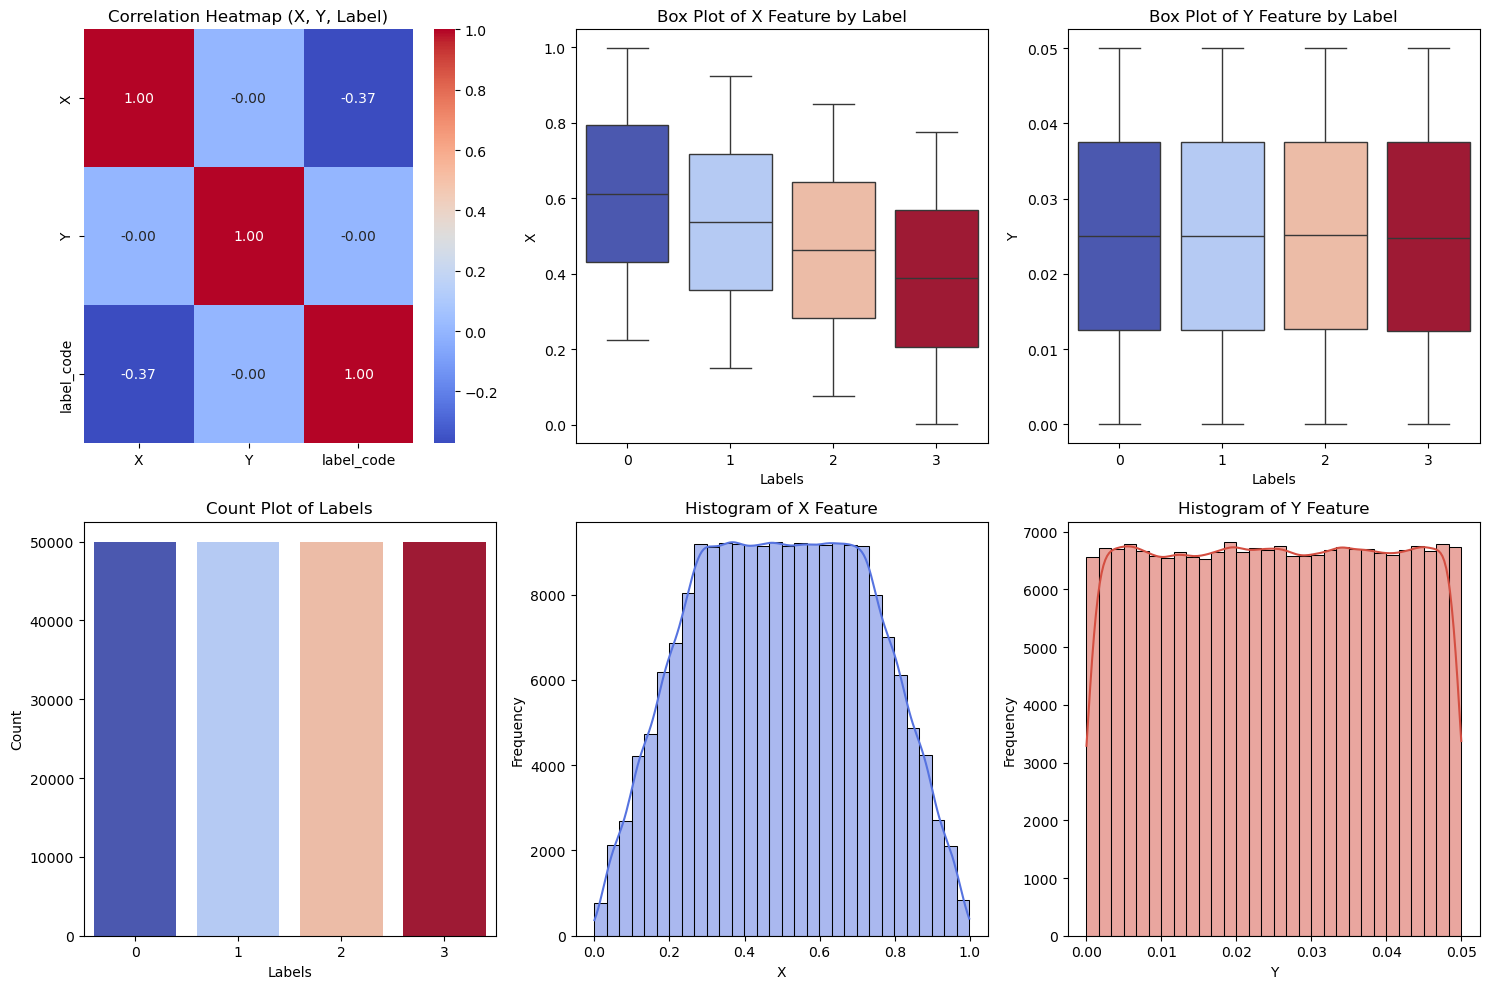

In [43]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
numeric_df_for_corr = df[['X', 'Y']].copy()
numeric_df_for_corr['label_code'] = df['label']
sns.heatmap(numeric_df_for_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (X, Y, Label)")

plt.subplot(2, 3, 2)
sns.boxplot(data=df, x="label", y="X", hue="label", palette="coolwarm", legend=False)
plt.title("Box Plot of X Feature by Label")
plt.xlabel("Labels")
plt.ylabel("X")

plt.subplot(2, 3, 3)
sns.boxplot(data=df, x="label", y="Y", hue="label", palette="coolwarm", legend=False)
plt.title("Box Plot of Y Feature by Label")
plt.xlabel("Labels")
plt.ylabel("Y")

plt.subplot(2, 3, 4)
sns.countplot(data=df, x="label", hue="label", palette="coolwarm", legend=False)
plt.title("Count Plot of Labels")
plt.xlabel("Labels")
plt.ylabel("Count")

coolwarm_palette = sns.color_palette("coolwarm", n_colors=10)  
light_blue = coolwarm_palette[0] 
red = coolwarm_palette[-1]

plt.subplot(2, 3, 5)
sns.histplot(df["X"], bins=30, kde=True, color=light_blue)
plt.title("Histogram of X Feature")
plt.xlabel("X")
plt.ylabel("Frequency")

plt.subplot(2, 3, 6)
sns.histplot(df["Y"], bins=30, kde=True, color=red)
plt.title("Histogram of Y Feature")
plt.xlabel("Y")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [45]:
def ks_test(feature):
    return ks_2samp(first_half[feature], second_half[feature]).pvalue

ks_results = {feature: ks_test(feature) for feature in ["X", "Y", "label"]}
print("KS Test Results:", ks_results)

KS Test Results: {'X': 3.41987844457291e-06, 'Y': 0.782800124460342, 'label': 1.0}


In [47]:
def js_divergence(feature):
    p = np.histogram(first_half[feature], bins=20, density=True)[0]
    q = np.histogram(second_half[feature], bins=20, density=True)[0]
    return entropy((p + q) / 2, base=2) - 0.5 * (entropy(p, base=2) + entropy(q, base=2))

js_results = {feature: js_divergence(feature) for feature in ["X", "Y"]}
print("JS Divergence Results:", js_results)

JS Divergence Results: {'X': 0.00011984975585388469, 'Y': 7.81808091394609e-05}


In [51]:
df["x_category"] = pd.qcut(df["X"], q=20, duplicates='drop')
df["Segment"] = ["First Half"] * split + ["Second Half"] * (len(df) - split)

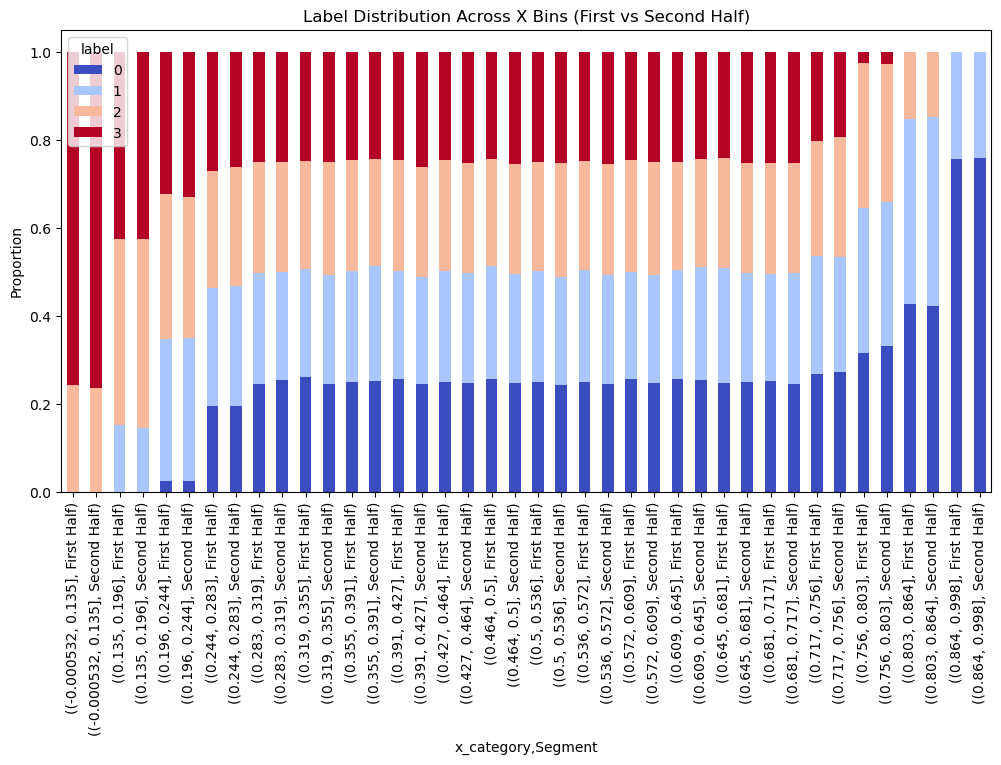

In [53]:
label_shift = df.groupby(["x_category", "Segment"], observed=False)["label"].value_counts(normalize=True).unstack()
label_shift.plot(kind="bar", stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title("Label Distribution Across X Bins (First vs Second Half)")
plt.ylabel("Proportion")
plt.show()

In [57]:
summary_stats_first = first_half.describe()
summary_stats_second = second_half.describe()
print("Summary Statistics - First Half:\n", summary_stats_first)
print("Summary Statistics - Second Half:\n", summary_stats_second)

Summary Statistics - First Half:
                    X             Y         label
count  100000.000000  1.000000e+05  100000.00000
mean        0.497367  2.502956e-02       1.50000
std         0.225912  1.443553e-02       1.11804
min         0.000468  8.000000e-07       0.00000
25%         0.316237  1.253007e-02       0.75000
50%         0.495862  2.501980e-02       1.50000
75%         0.678558  3.752105e-02       2.25000
max         0.998190  4.999930e-02       3.00000
Summary Statistics - Second Half:
                    X             Y         label
count  100000.000000  1.000000e+05  100000.00000
mean        0.502290  2.505755e-02       1.50000
std         0.225695  1.445315e-02       1.11804
min         0.001451  2.000000e-07       0.00000
25%         0.321460  1.254410e-02       0.75000
50%         0.503665  2.507570e-02       1.50000
75%         0.682934  3.757295e-02       2.25000
max         0.998054  4.999960e-02       3.00000


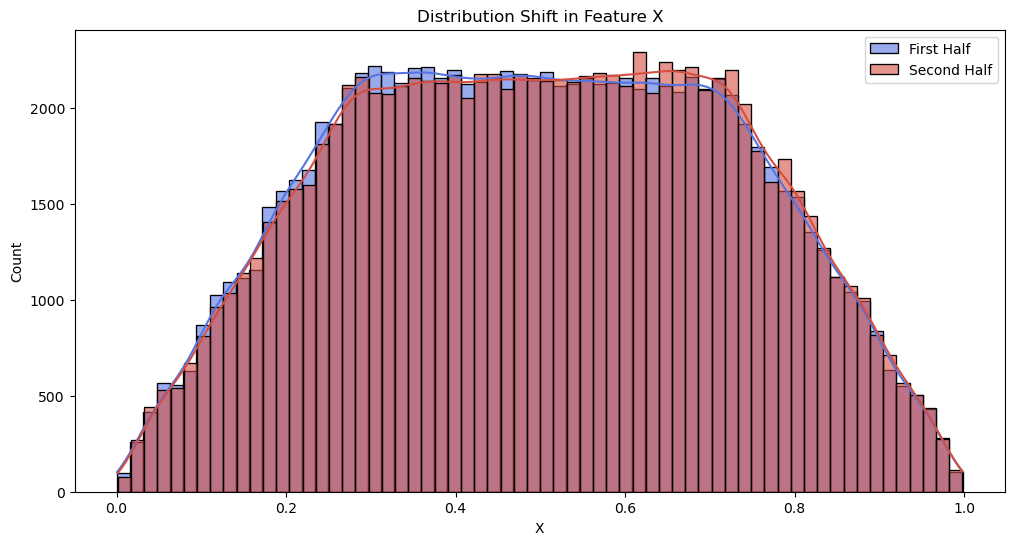

In [55]:
plt.figure(figsize=(12, 6))
sns.histplot(first_half["X"], color=light_blue, label='First Half', kde=True, alpha=0.6)
sns.histplot(second_half["X"], color=red, label='Second Half', kde=True, alpha=0.6)
plt.title("Distribution Shift in Feature X")
plt.legend()
plt.show()

## Summary 

#### Visualizaion Findings
The boxplot analysis of features highlights a significant change in feature X across different label distributions. Specifically:  

• In the **0–0.3 range of X, label 2** increases sharply while **label 3** decreases.  
• In the **0.4–0.6 range,** label distribution remains stable with no significant differences.  
• When **X > 0.6,** there is a **strong increase in label 0** and an **almost complete disappearance of label 3.**  

These observations indicate ***virtual concept drift*** — where the relationship between features and labels changes, even though the overall label distribution remains unchanged. Feature **X appears to drive this shift,** influencing how labels are assigned without affecting **Y** in the same way.  

Additionally, analyzing the **histogram shift of X** between the first and second halves of the dataset suggests ***real concept drift,*** where the feature distribution itself undergoes a measurable change.  

#### Statistical Analysis Findings  
1. Kolmogorov-Smirnov (KS) Test:  
• **Feature X: p-value = 3.42e-06,** confirming a significant distribution change, which supports the presence of ***real concept drift.***  
• **Feature Y: p-value = 0.7828,** indicating **no significant distributional shift** in Y.  
• **Label Distribution: p-value = 1.0,** showing label stability across both time periods.
 
3. Jensen-Shannon (JS) Divergence:  
• **X = 0.00012, Y = 0.000078** → Very low values, indicating an **overall minimal shift** in distribution.  

4. Summary Statistics:  
**Feature X:** Mean shifts slightly (**0.497 → 0.502**), but standard deviation remains stable.  
**Feature Y:** Almost no changes in mean or standard deviation.  
**Labels**: No noticeable variation, reinforcing the ***virtual drift interpretation.***  

#### Conclusion
The analysis reveals a **complex concept drift phenomenon:**  
  
• **Virtual Concept Drift:** The relationship between feature **X and labels changes,** affecting classification patterns without altering overall label distribution.  
• **Real Concept Drift:** A subtle shift in **feature X’s distribution** suggests an additional structural drift.  
• **Feature Y remains stable,** showing no signs of drift.  

This pattern suggests that decision boundaries **evolve over time,** requiring adjustments in model training to maintain accuracy.  